<a href="https://colab.research.google.com/github/satheesh3180/load_breast_cancer-/blob/main/CNN_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dummy dataset created successfully for demonstration.
Found 4 files belonging to 2 classes.
Found 2 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.0000e+00 - loss: 1.9222 - val_accuracy: 0.5000 - val_loss: 0.7852
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step - accuracy: 0.0000e+00 - loss: 2.0438 - val_accuracy: 0.5000 - val_loss: 0.8048
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step - accuracy: 0.2500 - loss: 1.4909 - val_accuracy: 0.5000 - val_loss: 0.8244
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step - accuracy: 0.5000 - loss: 1.1632 - val_accuracy: 0.5000 - val_loss: 0.8439
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.2151 - val_accuracy: 0.5000 - val_loss: 0.8649
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.9701 - val_accuracy: 0.5000 - val_loss: 0.8858
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step - accuracy: 0.7500 - loss: 0.8484 - val_accuracy: 0.5000 - val_loss: 0.9068
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step - accuracy: 0.7500 - loss: 0.7279 - val_accuracy: 0.5000 - val_loss

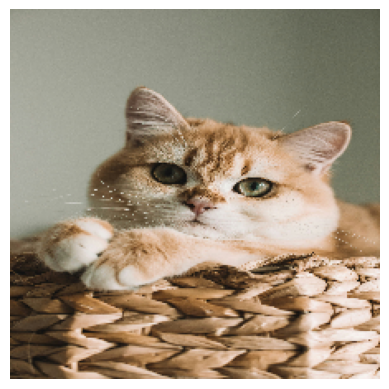

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import shutil
from PIL import Image

# =====================================================
# SETTINGS
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 10

# 👉 Choose model: "vgg" OR "resnet"
MODEL_TYPE = "resnet"   # change to "vgg" if needed

# =====================================================
# LOAD DATA
# =====================================================
# Create dummy dataset structure to avoid ValueError
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Clean up existing directories if they exist
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

# Create base directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create class subdirectories for binary classification
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')
test_cats_dir = os.path.join(test_dir, 'cat')
test_dogs_dir = os.path.join(test_dir, 'dog')

os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)
os.makedirs(test_cats_dir, exist_ok=True)
os.makedirs(test_dogs_dir, exist_ok=True)

# Create dummy image files
# Using PIL to create simple placeholder images
# For training data (2 images per class for minimal functionality)
for i in range(2):
    img_cat = Image.new('RGB', IMG_SIZE, color = (255, 0, 0)) # Red for cat
    img_cat.save(os.path.join(train_cats_dir, f'cat_{i:03d}.jpg'))
    img_dog = Image.new('RGB', IMG_SIZE, color = (0, 0, 255)) # Blue for dog
    img_dog.save(os.path.join(train_dogs_dir, f'dog_{i:03d}.jpg'))

# For testing data (1 image per class)
img_cat_test = Image.new('RGB', IMG_SIZE, color = (0, 255, 0)) # Green for cat
img_cat_test.save(os.path.join(test_cats_dir, 'cat_test_001.jpg'))
img_dog_test = Image.new('RGB', IMG_SIZE, color = (255, 255, 0)) # Yellow for dog
img_dog_test.save(os.path.join(test_dogs_dir, 'dog_test_001.jpg'))

print("Dummy dataset created successfully for demonstration.")

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/test", # Corrected path for test data
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_data.class_names
#print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# =====================================================
# DATA AUGMENTATION
# =====================================================
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# =====================================================
# BASE MODEL SELECTION
# =====================================================
if MODEL_TYPE == "vgg":
    base_model = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
    preprocess = tf.keras.applications.vgg16.preprocess_input
elif MODEL_TYPE == "resnet":
    base_model = tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))
    preprocess = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

# =====================================================
# BUILD MODEL
# =====================================================
model = models.Sequential([data_aug,layers.Lambda(preprocess),base_model,layers.GlobalAveragePooling2D(),

# Regularized dense layer
    layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.001)),layers.BatchNormalization(),layers.Dropout(0.5),

# Output activation
    layers.Dense(1, activation="sigmoid")
])

model.summary()

# =====================================================
# COMPILE
# =====================================================
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

# =====================================================
# TRAIN
# =====================================================
history = model.fit(train_data,validation_data=test_data,epochs=EPOCHS)

# =====================================================
# EVALUATE
# =====================================================
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Accuracy: {acc*100:.2f}%")

# =====================================================
# PREDICT SINGLE IMAGE
# =====================================================
img_path = "/content/daria-averina-_867Jy8LCkI-unsplash.jpg"  # change path

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]

print("\nPrediction Probability:", round(pred,3))
print("Prediction:", "DOG 🐶" if pred >= 0.5 else "CAT 🐱")

plt.imshow(img)
plt.axis("off")
plt.show()